In [3]:
from statsmodels.datasets import elec_equip as ds

elec_equip = ds.load().data.iloc[:, 0]

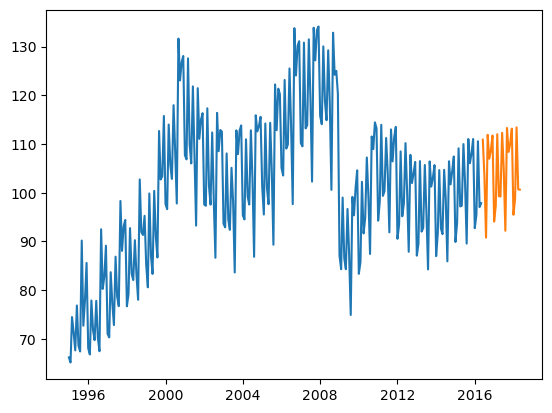

In [4]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.forecasting.stl import STLForecast
import matplotlib.pyplot as plt

elec_equip.index.freq = elec_equip.index.inferred_freq
stlf = STLForecast(elec_equip, ARIMA, model_kwargs=dict(order=(1, 1, 0), trend="t"))
stlf_res = stlf.fit()

forecast = stlf_res.forecast(24)
plt.plot(elec_equip)
plt.plot(forecast)
plt.show()

In [3]:
from statsmodels.tsa.ar_model import AutoReg, ar_select_order

trainSet, testSet = elec_equip[:-50], elec_equip[-50:]
sel = ar_select_order(trainSet, 13, "bic", glob=True, old_names=False)
sel.ar_lags
res_glob = sel.model.fit()
print(res_glob.summary())

                                 AutoReg Model Results                                  
Dep. Variable:     STS.M.I7.W.TOVT.NS0016.4.000   No. Observations:                  207
Model:                       Restr. AutoReg(13)   Log Likelihood                -517.201
Method:                         Conditional MLE   S.D. of innovations              3.480
Date:                          Mon, 13 Jan 2025   AIC                           1044.402
Time:                                  10:34:51   BIC                           1060.741
Sample:                              02-01-1996   HQIC                          1051.018
                                   - 03-01-2012                                         
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                                4.9398      1.794      2.754      0.006       1.4

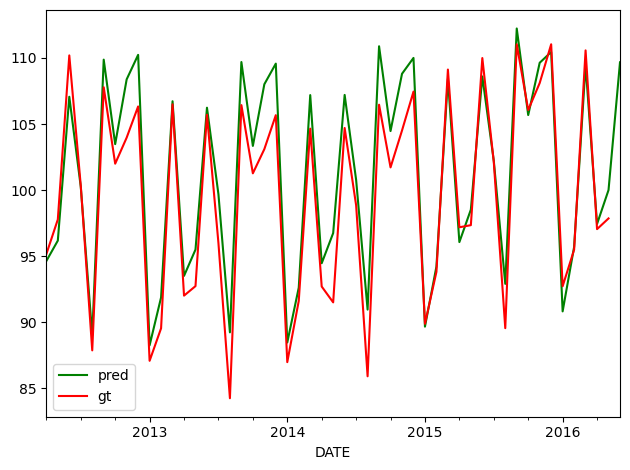

In [4]:
fig = res_glob.predict(trainSet.shape[0],trainSet.shape[0]+testSet.shape[0])
fig.plot(color='green', label='pred')
testSet.plot(color='red', label='gt')
plt.legend()
plt.tight_layout()
plt.show()

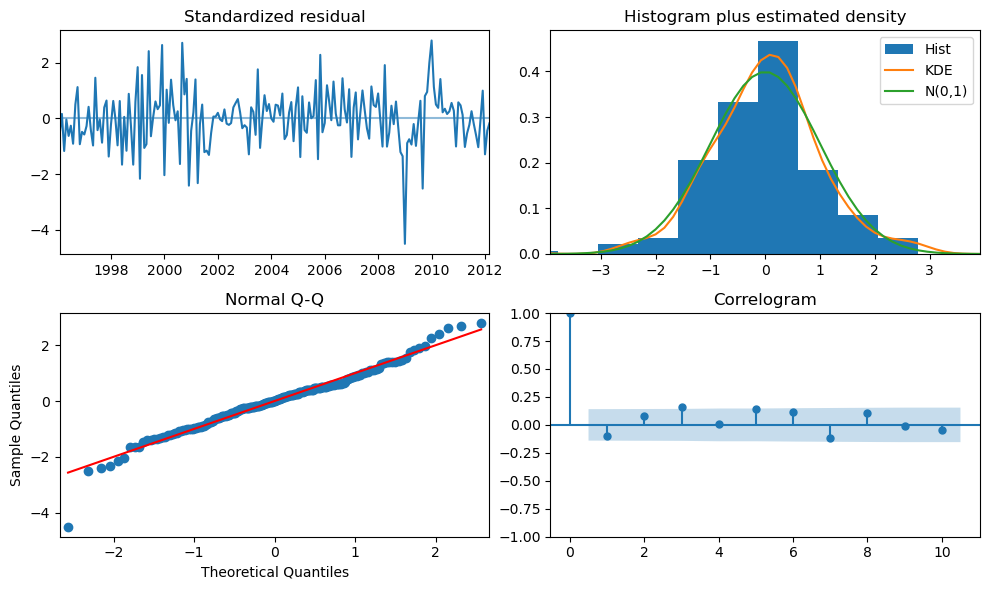

In [ ]:
fig = plt.figure(figsize=(10,6))
res_glob.plot_diagnostics(fig=fig)
plt.tight_layout()
plt.show()

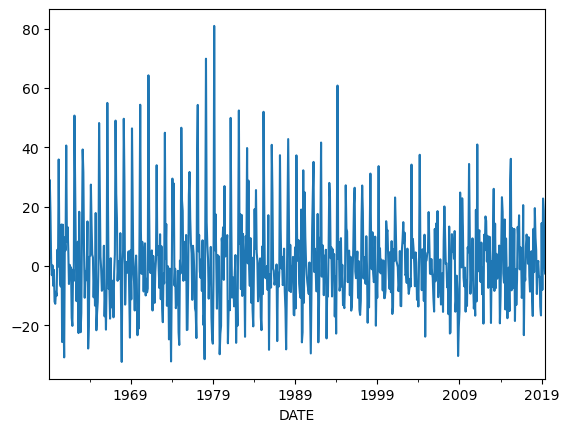

In [5]:
import pandas_datareader as pdr

data = pdr.get_data_fred("HOUSTNSA", "1959-01-01", "2019-06-01")
housing = data.HOUSTNSA.pct_change().dropna()
housing = 100* housing.asfreq("MS")
fig, ax = plt.subplots()
ax = housing.plot(ax=ax)

<Axes: xlabel='DATE'>

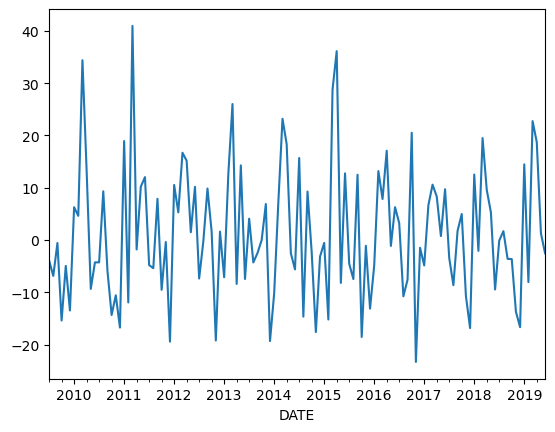

In [9]:
# focus on first 10 years

semiHouse = housing[-120:]
semiHouse.plot()

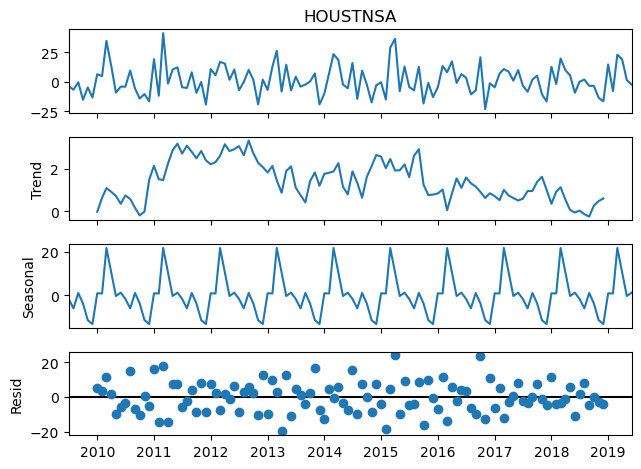

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompose = seasonal_decompose(x=semiHouse, model='additive')
decompose.plot()
plt.show()

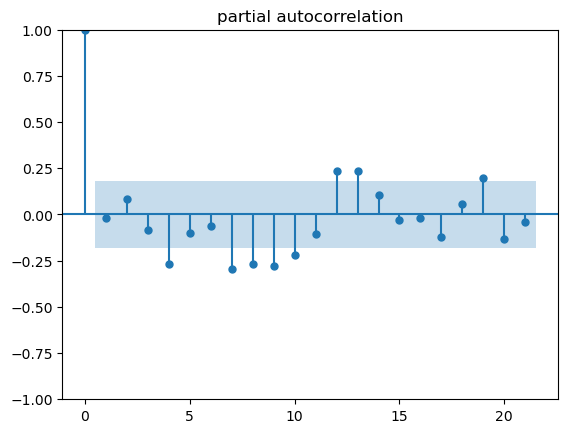

In [11]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(semiHouse, title='partial autocorrelation')
plt.show()

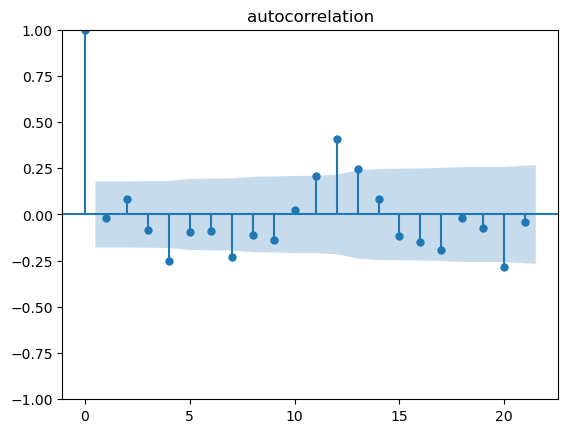

In [15]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(semiHouse, title='autocorrelation')
plt.show()

In [21]:
print(type(semiHouse))
semiHouse

<class 'pandas.core.series.Series'>


DATE
2009-07-01    -3.891709
2009-08-01    -6.866197
2009-09-01    -0.567108
2009-10-01   -15.399240
2009-11-01    -4.943820
                ...    
2019-02-01    -8.045977
2019-03-01    22.750000
2019-04-01    18.737271
2019-05-01     1.286449
2019-06-01    -2.540220
Freq: MS, Name: HOUSTNSA, Length: 120, dtype: float64

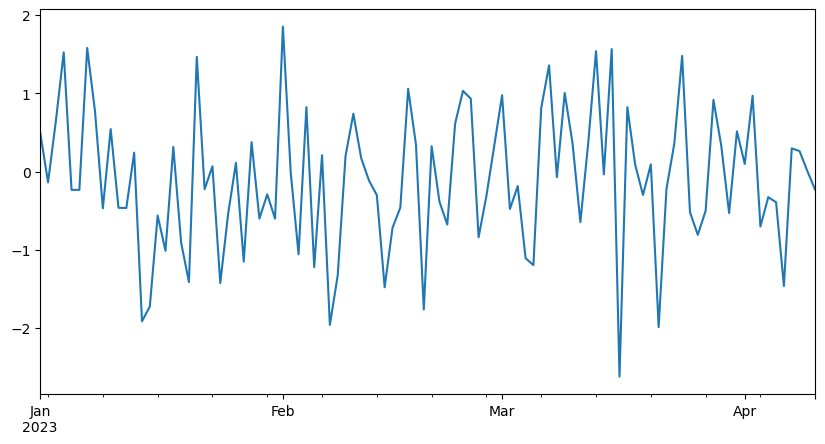

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

fig = plt.figure(figsize=(10,5))
# Genera una serie di rumore bianco
np.random.seed(42)
length = 100
noise = np.random.normal(0, 1, length)
date_index = pd.date_range(start='2023-01-01', periods=length, freq='D')

# Associa il noise a una Pandas Series
s = pd.Series(data=noise, index=date_index)

s.plot(fig=fig)
plt.show()


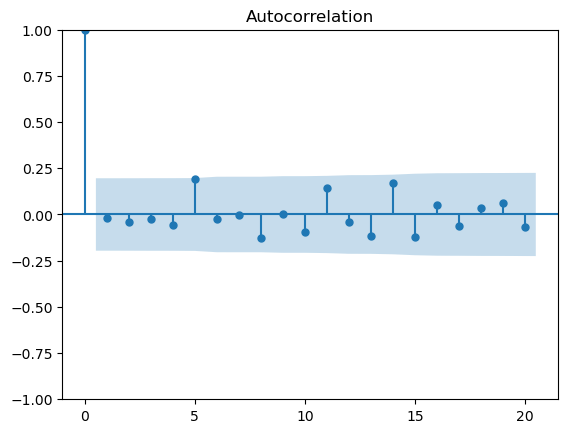

In [31]:
plot_acf(s)
plt.show()

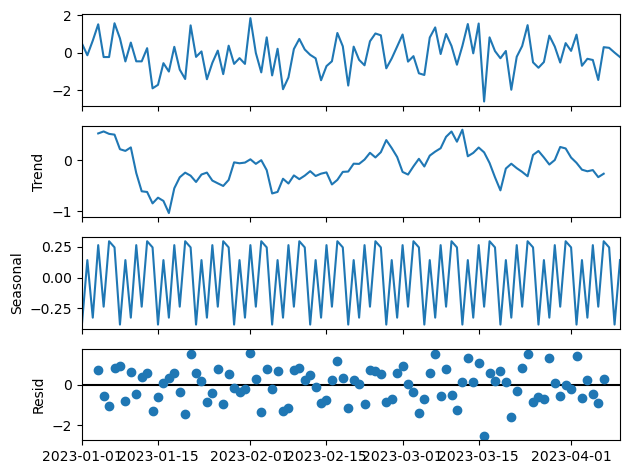

In [32]:
decompose = seasonal_decompose(x=s, model='additive')
decompose.plot()
plt.show()

In [43]:
trainSet, testSet = semiHouse[:108], semiHouse[108:]

In [44]:
sel = ar_select_order(trainSet, 13, seasonal=False, old_names=False)
print(sel.ar_lags)
res = sel.model.fit()
print(res.summary())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
                            AutoReg Model Results                             
Dep. Variable:               HOUSTNSA   No. Observations:                  108
Model:                    AutoReg(13)   Log Likelihood                -337.995
Method:               Conditional MLE   S.D. of innovations              8.490
Date:                Mon, 13 Jan 2025   AIC                            705.990
Time:                        12:09:31   BIC                            744.298
Sample:                    08-01-2010   HQIC                           721.469
                         - 06-01-2018                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            6.0920      1.829      3.332      0.001       2.508       9.676
HOUSTNSA.L1     -0.5971      0.098     -6.116      0.000      -0.788      -0.406


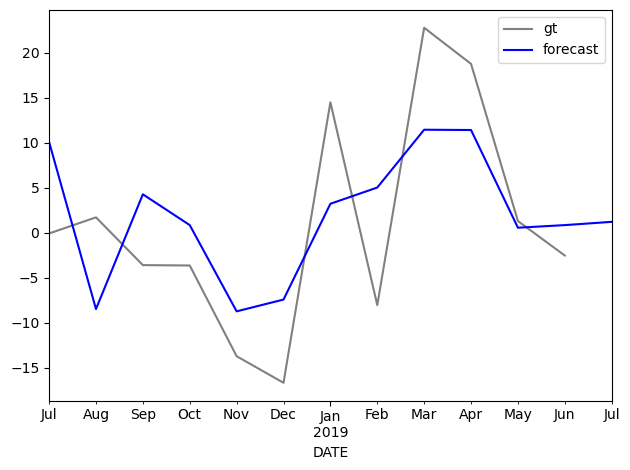

In [45]:
fig = res.predict(108,120)
testSet.plot(label='gt', color='grey')
fig.plot(label='forecast', color='blue')
plt.legend()
plt.tight_layout()
plt.show()

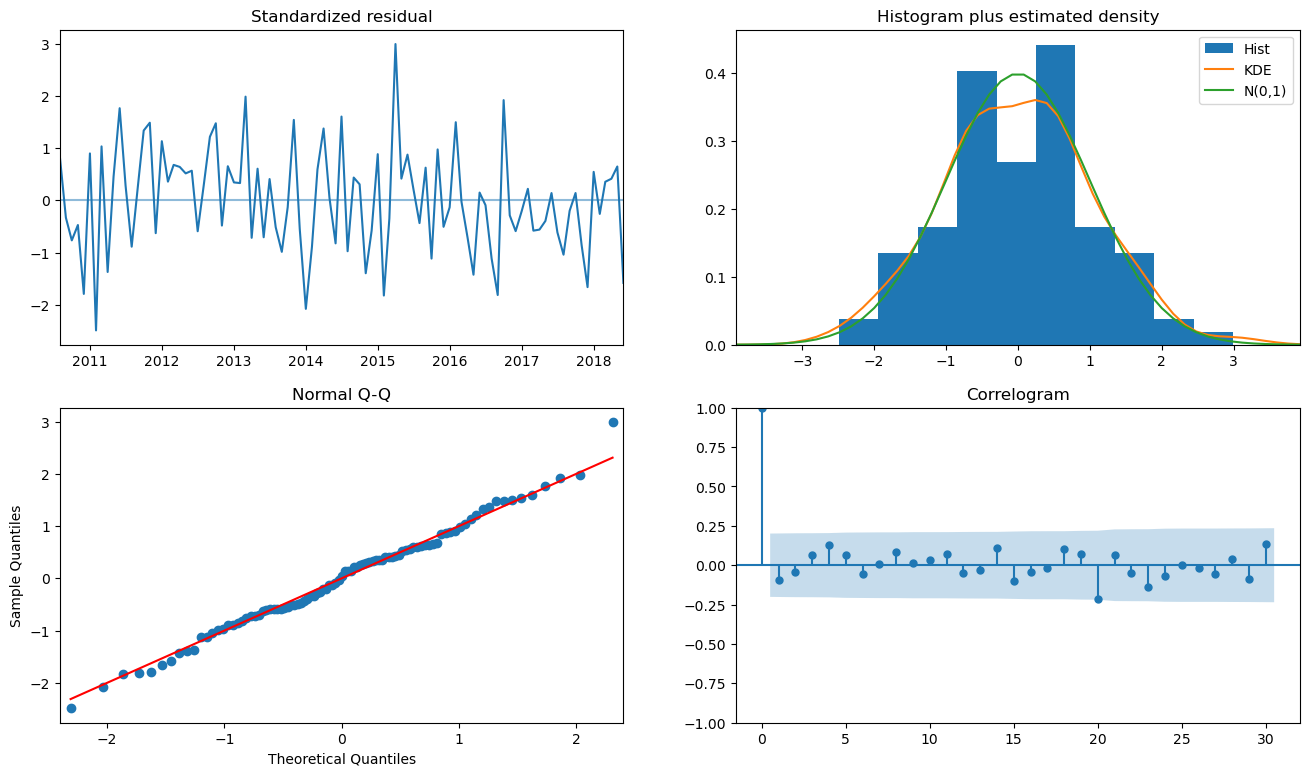

In [38]:
fig = plt.figure(figsize=(16, 9))
fig = res.plot_diagnostics(lags=30, fig=fig)

In [46]:
sel = ar_select_order(trainSet, 13, seasonal=True, old_names=False)
print(sel.ar_lags)
res = sel.model.fit()
print(res.summary())

[1, 2]
                            AutoReg Model Results                             
Dep. Variable:               HOUSTNSA   No. Observations:                  108
Model:               Seas. AutoReg(2)   Log Likelihood                -366.319
Method:               Conditional MLE   S.D. of innovations              7.667
Date:                Mon, 13 Jan 2025   AIC                            762.638
Time:                        12:09:45   BIC                            802.590
Sample:                    09-01-2009   HQIC                           778.831
                         - 06-01-2018                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           2.5844      2.746      0.941      0.347      -2.797       7.966
s(2,12)        -6.9827      3.853     -1.812      0.070     -14.534       0.568
s(3,12)        -3.3366      3.854     -0.

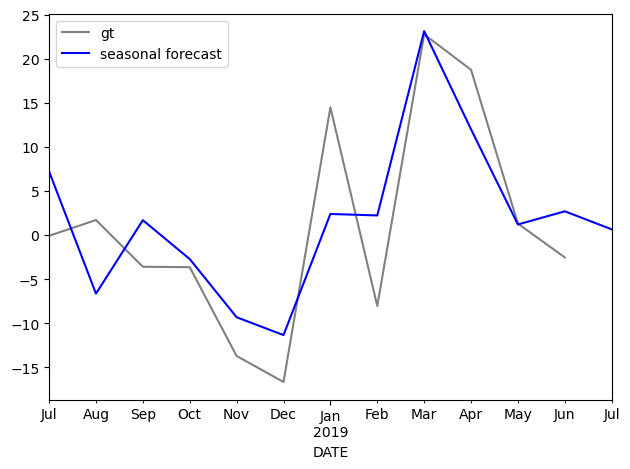

In [47]:
figSeasonal = res.predict(108,120)
testSet.plot(label='gt', color='grey')
figSeasonal.plot(label='seasonal forecast', color='blue')
plt.legend()
plt.tight_layout()
plt.show()

In [52]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

mse = mean_squared_error(testSet, fig[:-1])
mae = mean_absolute_error(testSet, fig[:-1])
mape = mean_absolute_percentage_error(testSet, fig[:-1])

print('NOT SEASONAL')
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.4f}")

NOT SEASONAL
MSE: 74.1970
MAE: 7.8339
MAPE: 10.7744


In [53]:
mse = mean_squared_error(testSet, figSeasonal[:-1])
mae = mean_absolute_error(testSet, figSeasonal[:-1])
mape = mean_absolute_percentage_error(testSet, figSeasonal[:-1])

print('SEASONAL')
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.4f}")

SEASONAL
MSE: 43.6470
MAE: 5.5288
MAPE: 7.7972


## LSTM

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 129ms/step


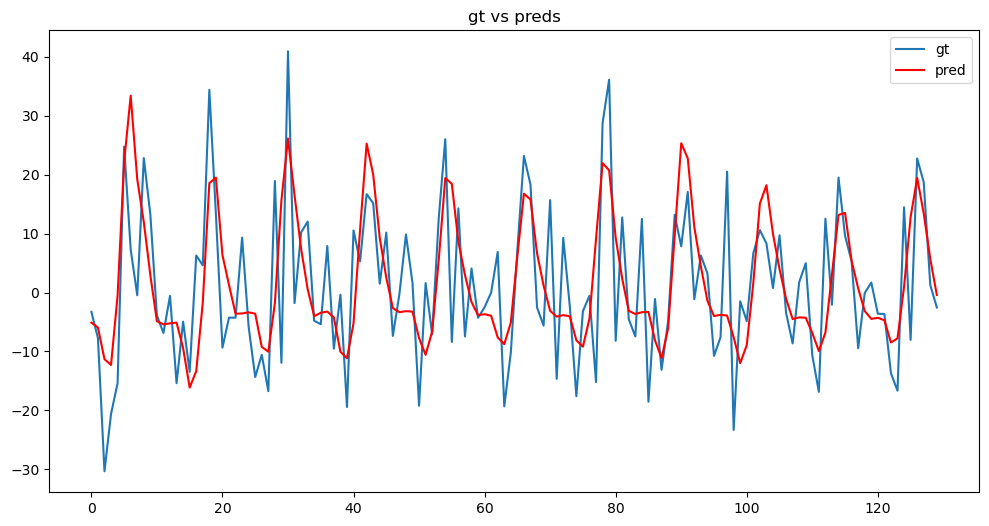

In [7]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, InputLayer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(housing.values.reshape(-1, 1))

def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])
        y.append(data[i+sequence_length])
    return np.array(X), np.array(y)

sequence_length = 75
X, y = create_sequences(data_scaled, sequence_length)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

model = Sequential([
    InputLayer(shape=(sequence_length, 1)),
    LSTM(400, return_sequences=True),
    LSTM(400, return_sequences=True),
    LSTM(100, return_sequences=False),
    Dense(25, activation='relu'),
    Dense(1)
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=16, verbose=0)

predictions = model.predict(X_test)
predictions_rescaled = scaler.inverse_transform(predictions)
y_test_rescaled = scaler.inverse_transform(y_test)

plt.figure(figsize=(12, 6))
plt.plot(y_test_rescaled, label='gt')
plt.plot(predictions_rescaled, label='pred', color='red')
plt.legend()
plt.title('gt vs preds')
plt.show()

In [ ]:
sequence_lengths = [25,50,75,100]
lrs = [0.01,0.001,0.0001]
batches = [16,32,64]

for sequence_length in sequence_lengths:
    for lr in lrs:
        for batch_size in batches:
            X, y = create_sequences(data_scaled, sequence_length)

            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

            model = Sequential([
                InputLayer(shape=(sequence_length, 1)),
                LSTM(400, return_sequences=True),
                LSTM(400, return_sequences=True),
                LSTM(100, return_sequences=False),
                Dense(25, activation='relu'),
                Dense(1)
            ])

            model.compile(optimizer=Adam(learning_rate=lr), loss='mean_squared_error')

            history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=batch_size, verbose=0)

            predictions = model.predict(X_test)
            predictions_rescaled = scaler.inverse_transform(predictions)
            y_test_rescaled = scaler.inverse_transform(y_test)

            fname = f'out/{sequence_length}-{lr}-{batch_size}.png'
            plt.figure(figsize=(12, 6))
            plt.plot(y_test_rescaled, label='gt')
            plt.plot(predictions_rescaled, label='pred', color='red')
            plt.legend()
            plt.title('gt vs preds')
            #plt.show()
            plt.savefig(fname=fname)

In [9]:
mse = mean_squared_error(y_test_rescaled,predictions_rescaled)
mae = mean_absolute_error(y_test_rescaled,predictions_rescaled)
mape = mean_absolute_percentage_error(y_test_rescaled,predictions_rescaled)  # actually not suitable

print('SEASONAL')
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.4f}")

SEASONAL
MSE: 109.4393
MAE: 8.3266
MAPE: 136913645933491.5000


[1, 2]
                            AutoReg Model Results                             
Dep. Variable:               HOUSTNSA   No. Observations:                  605
Model:               Seas. AutoReg(2)   Log Likelihood               -2207.783
Method:               Conditional MLE   S.D. of innovations              9.416
Date:                Mon, 13 Jan 2025   AIC                           4445.566
Time:                        12:54:17   BIC                           4511.595
Sample:                    04-01-1959   HQIC                          4471.264
                         - 06-01-2009                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.3020      1.522      0.856      0.392      -1.681       4.285
s(2,12)        34.4490      1.996     17.260      0.000      30.537      38.361
s(3,12)        23.2028      2.768      8.

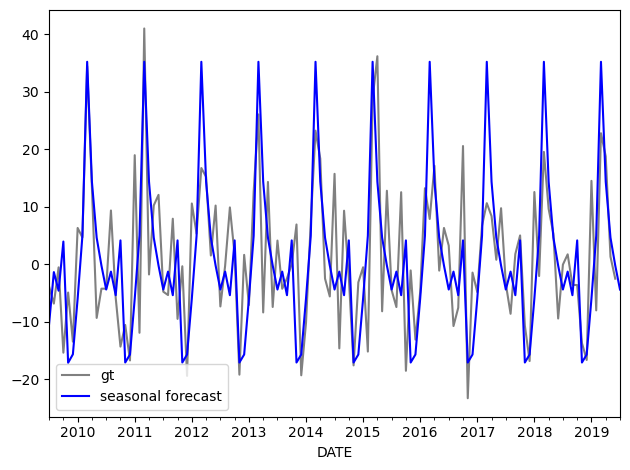

In [70]:
trainSet, testSet = housing[:-120], housing[-120:]
sel = ar_select_order(trainSet, 13, seasonal=True, old_names=False)
print(sel.ar_lags)
res = sel.model.fit()
print(res.summary())
figSeasonal = res.predict(trainSet.shape[0],trainSet.shape[0] + testSet.shape[0])
testSet.plot(label='gt', color='grey')
figSeasonal.plot(label='seasonal forecast', color='blue')
plt.legend()
plt.tight_layout()
plt.show()

In [78]:
mse = mean_squared_error(testSet, figSeasonal[:-1])
mae = mean_absolute_error(testSet, figSeasonal[:-1])
mape = mean_absolute_percentage_error(testSet, figSeasonal[:-1])

print('SEASONAL')
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.4f}")

SEASONAL
MSE: 117.4886
MAE: 8.3930
MAPE: 154718491545386.8125


# STATSFORECAST

In [101]:
df = pd.read_csv('https://datasets-nixtla.s3.amazonaws.com/air-passengers.csv', parse_dates=['ds'])
df.head()


,unique_id,ds,y
0,AirPassengers,1949-01-01,112
1,AirPassengers,1949-02-01,118
2,AirPassengers,1949-03-01,132
3,AirPassengers,1949-04-01,129
4,AirPassengers,1949-05-01,121


In [121]:
df = pd.DataFrame({'unique_id': np.zeros(len(housing), dtype=np.int64), 'ds':housing.index, 'y':housing.values})
df.head()

,unique_id,ds,y
0,0,1959-02-01,2.910603
1,0,1959-03-01,28.989899
2,0,1959-04-01,18.089272
3,0,1959-05-01,1.127321
4,0,1959-06-01,-3.081967


In [113]:
from statsforecast import StatsForecast
from statsforecast.models import AutoARIMA

In [122]:
sf = StatsForecast(
    models=[AutoARIMA(season_length = 12)],
    freq='MS',
)
sf.fit(df)

StatsForecast(models=[AutoARIMA])

In [123]:
forecast_df = sf.predict(h=12, level=[90])  # h --> steps, level --> confidence
forecast_df.tail()

,unique_id,ds,AutoARIMA,AutoARIMA-lo-90,AutoARIMA-hi-90
7,0,2020-02-01,1.881183,-14.457768,18.220134
8,0,2020-03-01,20.347292,4.008341,36.686243
9,0,2020-04-01,12.694472,-3.644479,29.033423
10,0,2020-05-01,2.573406,-13.765545,18.912357
11,0,2020-06-01,1.494404,-14.844547,17.833355


In [125]:
trainSet, testSet = df[:-100], df[-100:]

In [135]:
sf = StatsForecast(
    models=[AutoARIMA(season_length=12, max_p=12, max_q=9, max_P=12, max_Q=12)],
    freq='MS',
)
sf.fit(trainSet)

forecast_df = sf.predict(h=len(testSet), level=[90])  # h --> steps, level --> confidence

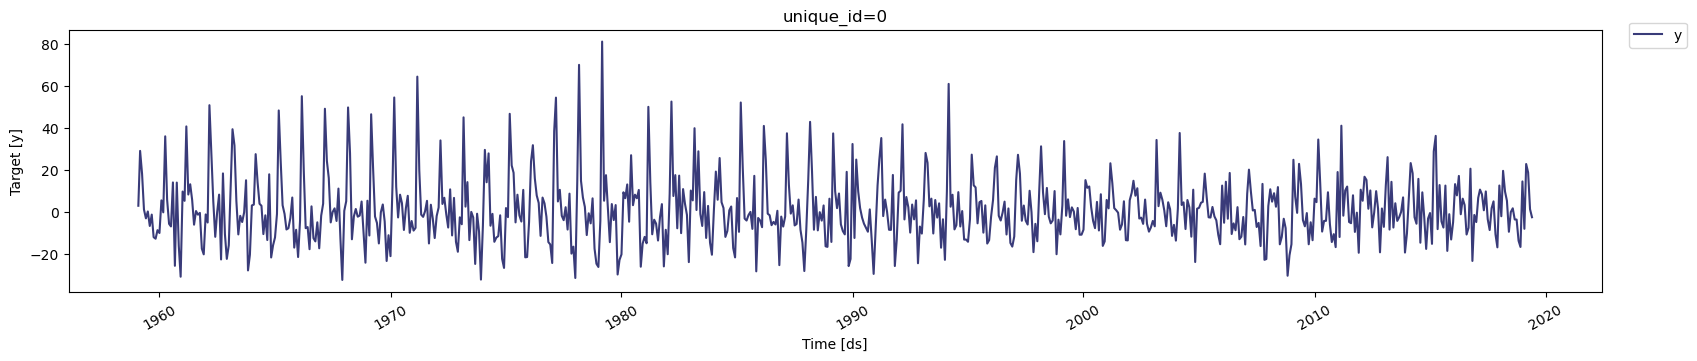

In [136]:
sf.plot(trainSet, testSet, level=[90])

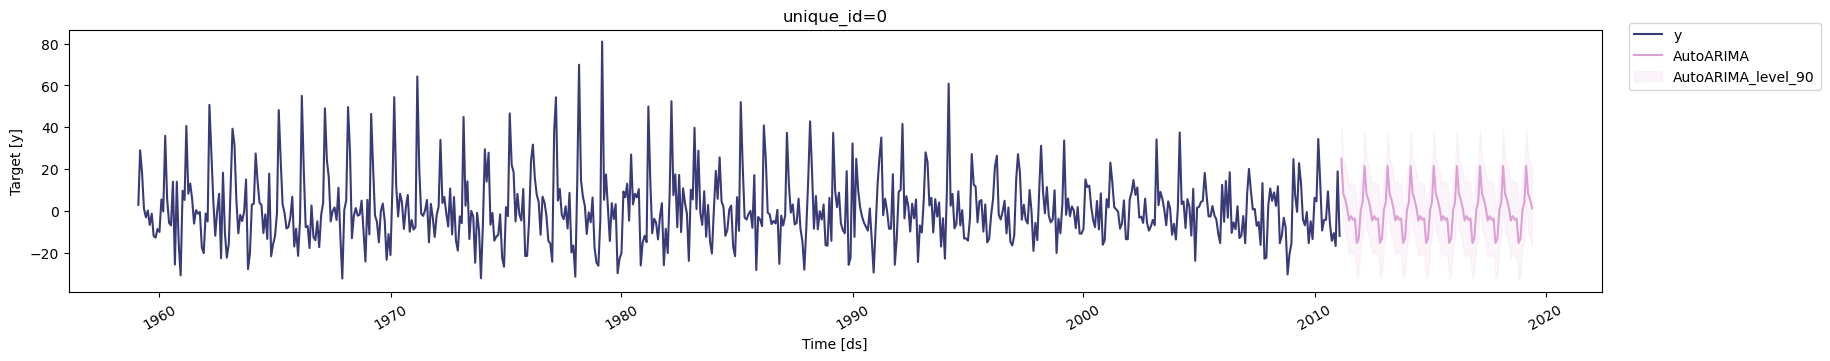

In [137]:
sf.plot(trainSet, forecast_df, level=[90])

c:\Users\matti\anaconda3\envs\timeSeries\Lib\site-packages\statsforecast\tbats.py:949: UserWarning: Data contains zero or negative values, disabling Box-Cox transformation.
  warnings.warn(


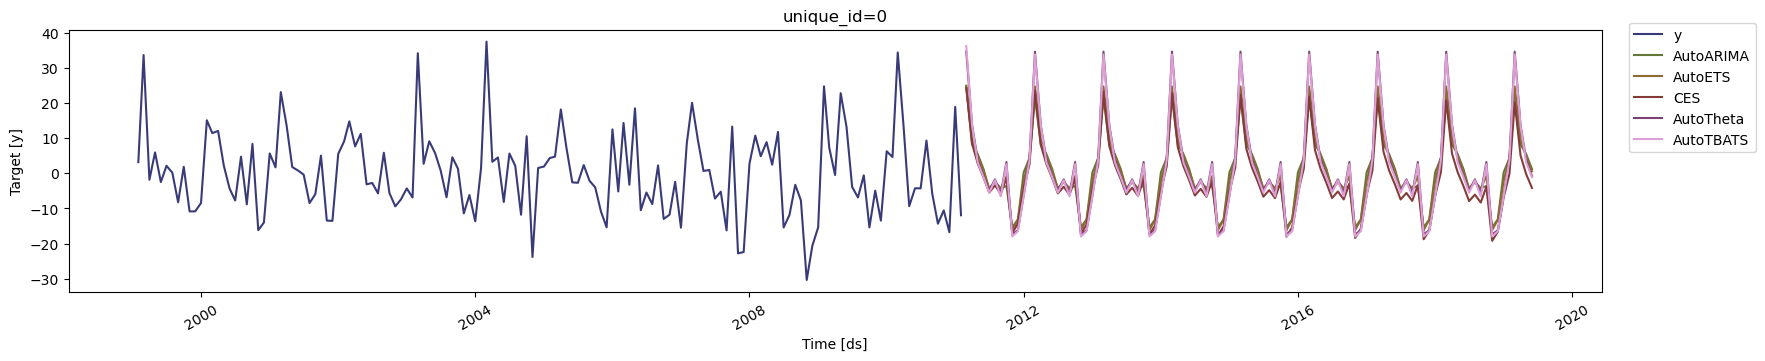

In [150]:
from statsforecast.models import *

'''
sf = StatsForecast(
    models=[AutoARIMA(season_length=12), AutoETS(season_length=12), AutoCES(season_length=12),
            AutoTheta(season_length=12), AutoMFLES(season_length=12, test_size=len(testSet)), AutoTBATS(season_length=12)],
    freq='MS',
)
'''
sf = StatsForecast(
    models=[AutoARIMA(season_length=12), AutoETS(season_length=12), AutoCES(season_length=12), AutoTheta(season_length=12), AutoTBATS(season_length=12)],
    freq='MS',
)
sf.fit(trainSet)

forecast_df = sf.predict(h=len(testSet))  # h --> steps, level --> confidence
sf.plot(trainSet[480:], forecast_df)

# RANDOM FOREST

Mean Squared Error: 133.3989


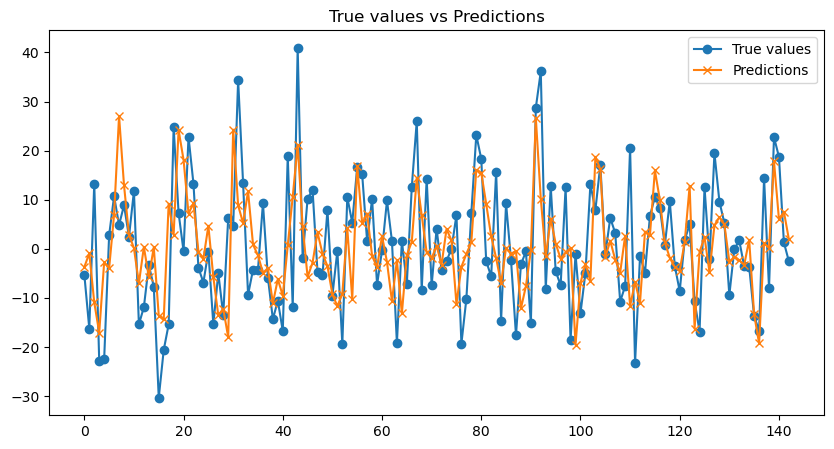

In [14]:
from sklearn.ensemble import RandomForestRegressor

def create_lag_features(data, lag):  # sliding windows of "lag" size
    X, y = [], []
    for i in range(lag, len(data)):
        X.append(data[i-lag:i])
        y.append(data[i])
    return np.array(X), np.array(y)

lag = 12

housing_values = housing.values
X, y = create_lag_features(housing_values, lag)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

rf = RandomForestRegressor(n_estimators=1000, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")

plt.figure(figsize=(10, 5))
plt.plot(range(len(y_test)), y_test, label="True values", marker='o')
plt.plot(range(len(y_pred)), y_pred, label="Predictions", marker='x')
plt.legend()
plt.title("True values vs Predictions")
plt.show()

In [13]:
print(X_train[0])
print(y_train[0])
print(X_train[1])

[  2.91060291  28.98989899  18.08927173   1.12732095  -3.08196721
   0.202977    -6.68467252  -1.3024602  -12.02346041 -12.75
  -8.69149952 -10.041841  ]
5.465116279069782
[ 28.98989899  18.08927173   1.12732095  -3.08196721   0.202977
  -6.68467252  -1.3024602  -12.02346041 -12.75        -8.69149952
 -10.041841     5.46511628]
